In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pandas as pd

# Geluid creëren met python

In [2]:
#De ferqentie sampel rate benoemen
fs = 44000

In [3]:
#Hier maken we 1 ferquentie aan
f = 200 # frequentie van de sinus
duration = 5 # totale tijdsduur van het geluid
t = np.linspace(0, duration, int(fs*duration)) # 0 tot t_tot seconden in fs*t_tot stappen

#Uiteindelijke data
ferquentie_specterum = 0.1*np.sin(2*np.pi*f*t)

In [89]:
# Hier spelen we de data af op de speaker (device = 4) en fs is de ferquentie waarme
sd.play(ferquentie_specterum,fs ,device = 4)
sd.wait()

# Data uitlezen van de oscilloscoop

In [4]:
#We lezen hier de data uit
geluidje = pd.read_csv('geluid 200 hz meting 2.csv')

In [5]:
#Om te kijken hoe de kollomen nu heten printen we de bovenste 5 van de data set
geluidje.head()

,Record Length,2500,Points,-51.99999735E-3,4.48000002,Unnamed: 5
0,Sample Interval,39.99999899E-6,s,-0.05196,4.64,NaN
1,Trigger Point,1.3000000E3,Samples,-0.05192,4.72,NaN
2,NaN,NaN,NaN,-0.05188,4.80,NaN
3,NaN,NaN,NaN,-0.05184,4.72,NaN
4,NaN,NaN,NaN,-0.05180,4.72,NaN


In [6]:
#We renamen de kollomen naar handige namen
geluidje.rename(columns = {'-51.99999735E-3':'Tijd'}, inplace = True)
geluidje.rename(columns = {'4.48000002':'Voltage'}, inplace = True)

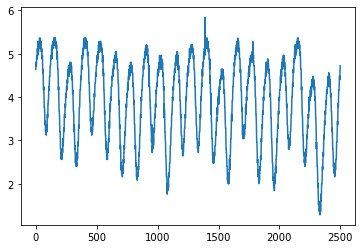

In [7]:
plt.plot(geluidje['Voltage'])

In [8]:
#Maken wat constantes aan om later te gebruiken
aantal_data = len(geluidje['Voltage'])-1
#We noemen het hier wel een evenwichts stand maar het is het niet helemaal
gemiddelde_meting = sum(geluidje['Voltage'])/aantal_data
print(aantal_data)

2498


In [13]:
#Hier maken we het geluid langer anders valt het niet te horen
geluid = geluidje['Voltage'].to_numpy()
langer_geluid = geluid
#Dus we maken het 50x zo lang het fragment
for _ in range(49):
    langer_geluid = np.concatenate((langer_geluid,geluid))

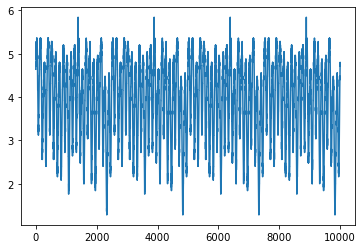

In [14]:
plt.plot(langer_geluid[0:10000])

In [15]:
#Om het te kunnen afspelen moeten we de data nog manipuleren
#omdat de data in voltage staat kunnen we het niet meteen afspelen
afspelen = langer_geluid

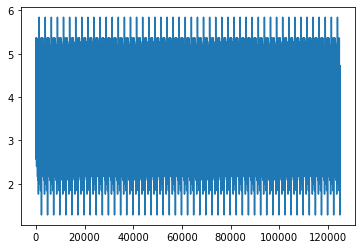

In [16]:
plt.plot(afspelen)

In [17]:
afspelen = afspelen-gemiddelde_meting

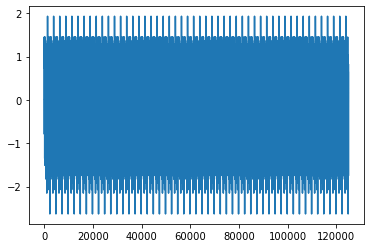

In [18]:
plt.plot(afspelen)

In [19]:
# en nu het geluid 10x zo laag maken ander is het te hard
afspelen = afspelen/10

In [20]:
#We hebben ook een andere sample rate nodig die rekenen we hier onder uit
fs_muziek = aantal_data*10

In [21]:
sd.play(afspelen,fs_muziek,device = 4)
sd.wait()

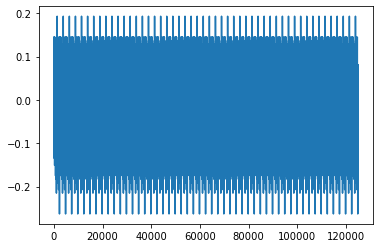

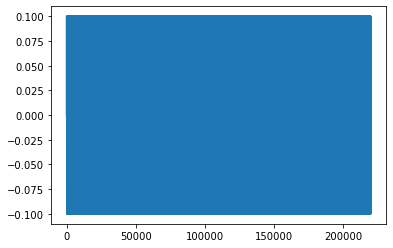

In [22]:
plt.plot((langer_geluid-gemiddelde_meting)/10)
plt.show()
plt.plot(ferquentie_specterum)

Text(0.5, 1.0, 'Scatter plot van data 200 hz')

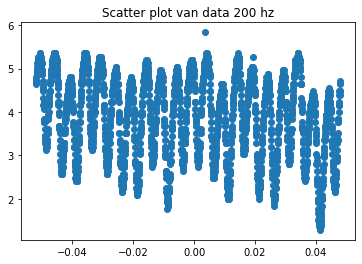

In [24]:
plt.scatter(geluidje['Tijd'],geluidje['Voltage'])
plt.title('Scatter plot van data 200 hz')

In [27]:
#Hier kunnen we de recording afspelen
sd.play((langer_geluid-gemiddelde_meting)/10,aantal_data*10,device = 4)
sd.wait()

In [28]:
# Hier spelen we de data af op de speaker (device = 4) en fs is de ferquentie waarme
sd.play(ferquentie_specterum,fs ,device = 4)
sd.wait()

Ze klinken het zelfde dus het experiment is gelukt